# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

## Dataset
We Have around 409 images with around 1000 faces manually tagged via bounding box.


# Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the "images.npy" file 


In [2]:
import numpy as np
data = np.load('/content/drive/MyDrive/ColabNotebooks/images1.npy', allow_pickle=True)

### We will just check one sample from the loaded "images.npy" file


In [3]:
data[0][0]

array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)

In [4]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__
from tensorflow.keras.metrics import Recall, Precision
import matplotlib.pyplot as plt
np.random.seed(42)
tensorflow.random.set_seed(42)

### Setting image dimensions  
- We will initialize image height, image width with value: 224 

In [5]:
IMAGE_HEIGHT= 224
IMAGE_WIDTH=  224
data[0][1]

[{'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
 {'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}]

### Creating features and labels
We already know -
Here 
- feature is the image
- The label is the mask

We will store Images in "X" array and masks in "masks" array

In [6]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [7]:
X.shape

(409, 224, 224, 3)

### Splitting the data into training and testing 
- We will use 400 images in training set and 9 images in the testing set

Training data

In [8]:
X_train = X[0:400]
y_train = masks[0:400]

In [9]:
masks[0:400].shape

(400, 224, 224)

Testing data

In [10]:
X_test = X[400:410]
y_test = masks[400:410]

In [11]:
X_test.shape

(9, 224, 224, 3)

In [12]:
X_train.shape

(400, 224, 224, 3)

In [13]:
y_train.shape

(400, 224, 224)

### Printing a sample training image, image array and its mask

Printing the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


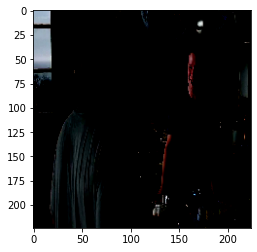

In [14]:
plt.imshow(X_train[1])

In [15]:
print(X_train[1])

[[[ 0.62352943  0.69411767  0.78039217]
  [ 0.62352943  0.69411767  0.78039217]
  [ 0.60000002  0.68627453  0.78039217]
  ...
  [-0.73333335 -0.74901962 -0.74117649]
  [-0.73333335 -0.74901962 -0.74117649]
  [-0.72549021 -0.74901962 -0.74117649]]

 [[ 0.62352943  0.69411767  0.78039217]
  [ 0.6156863   0.69411767  0.78039217]
  [ 0.60784316  0.69411767  0.77254903]
  ...
  [-0.74117649 -0.74901962 -0.74117649]
  [-0.72549021 -0.74117649 -0.73333335]
  [-0.72549021 -0.74117649 -0.73333335]]

 [[ 0.6156863   0.69411767  0.78039217]
  [ 0.6156863   0.69411767  0.78039217]
  [ 0.60784316  0.69411767  0.78039217]
  ...
  [-0.74117649 -0.74901962 -0.74901962]
  [-0.71764708 -0.73333335 -0.72549021]
  [-0.73333335 -0.74901962 -0.74117649]]

 ...

 [[-0.74901962 -0.81960785 -0.8509804 ]
  [-0.73333335 -0.80392158 -0.83529413]
  [-0.71764708 -0.78823531 -0.82745099]
  ...
  [-1.         -0.99215686 -0.96862745]
  [-1.         -0.99215686 -0.96862745]
  [-1.         -0.99215686 -0.96862745]]

 [

Print the mask

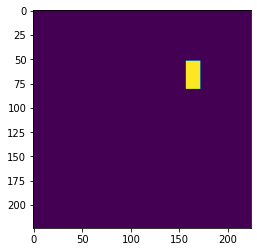

In [16]:
plt.imshow(y_train[1])

## Creating the model 

In [17]:
import tensorflow
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D,Input,Activation,BatchNormalization,Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K

def create_model(Trainable=True):
  inputs = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3),name = 'input_image')
  # pre-trained network
  encoder = MobileNet(input_tensor = inputs,input_shape= (IMAGE_HEIGHT, IMAGE_WIDTH, 3) ,include_top=False, alpha=1.0, weights="imagenet")
  for layer in encoder.layers[:60]:
    layer.trainable = Trainable

  skip_connections = ["input_image","conv_pw_1_relu","conv_pw_3_relu","conv_pw_5_relu"]
  encoder_output = encoder.get_layer("conv_pw_11_relu").output

    
  f = [14,28,56,112]
  x = encoder_output
  for i in range (1,len(skip_connections)+1):
    x_skip = encoder.get_layer(skip_connections[-i]).output
    x = UpSampling2D((2,2))(x)
    x = Concatenate()([x,x_skip])
    
    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
        
    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

  x = Conv2D(1, (1, 1), padding="same")(x)
  x = Activation("sigmoid")(x)
  x = Reshape((IMAGE_HEIGHT,IMAGE_WIDTH))(x)
   
  build_model = Model(inputs,x)
  return build_model

### Calling the create_model function
- We will put trainable=False as argument, since we want to freeze lower layers for fast training but it will give low accuracy

In [18]:
model = create_model(False)

### Printing model summary 

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_image[0][0]                
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
______________________________________________________________________________________________

### Defining dice coefficient function 
- Creating a function to calculate dice coefficient


In [20]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())


### Defining loss function

In [21]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

### Compiling the model with optimizer as adam and metrics as dice_coefficient

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Defining callbacks
- ModelCheckpoint
- EarlyStopping
- ReduceLROnPlateau

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("/content/drive/MyDrive/ColabNotebooks/", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)

stop = EarlyStopping(monitor="val_loss", patience=5)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1)


### Fit the model 
- Fitting the model using 
  - epochs: 20
  - batch_size: 1
  - callbacks: checkpoint, earlystopping and reduce_lr

In [24]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20, batch_size=1, verbose=1, callbacks=[checkpoint, stop, reduce_lr ])

Epoch 1/20
400/400 [==============================] - 10s 12ms/step - loss: 2.1803 - dice_coefficient: 0.2920 - val_loss: 1.6873 - val_dice_coefficient: 0.3207

Epoch 00001: val_loss improved from inf to 1.68726, saving model to /content/drive/MyDrive/ColabNotebooks/
Epoch 2/20
400/400 [==============================] - 4s 11ms/step - loss: 1.4338 - dice_coefficient: 0.3932 - val_loss: 1.5112 - val_dice_coefficient: 0.3370

Epoch 00002: val_loss improved from 1.68726 to 1.51124, saving model to /content/drive/MyDrive/ColabNotebooks/
Epoch 3/20
400/400 [==============================] - 4s 11ms/step - loss: 1.2275 - dice_coefficient: 0.4612 - val_loss: 1.3633 - val_dice_coefficient: 0.3870

Epoch 00003: val_loss improved from 1.51124 to 1.36330, saving model to /content/drive/MyDrive/ColabNotebooks/
Epoch 4/20
400/400 [==============================] - 4s 11ms/step - loss: 0.9667 - dice_coefficient: 0.5253 - val_loss: 1.2366 - val_dice_coefficient: 0.3997

Epoch 00004: val_loss improved

## Getting the predicted mask for a test image

In [25]:
# Predict on train, val and test
preds_train = model.predict(X_train)
preds_val = model.predict(X_test)

## Dislaying the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


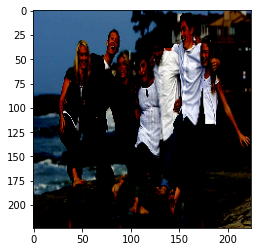

In [26]:
plt.imshow(X_test[2])

Showing the original mask for test image

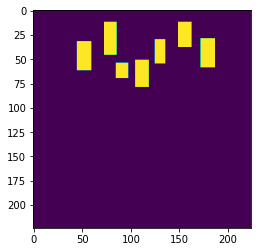

In [27]:
plt.imshow(y_test[2])

Predicting the mask on the test image

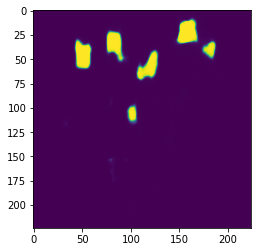

In [28]:
plt.imshow(preds_val[2])

### Imposing the mask on the test image 
- In imshow use the alpha parameter and set it to greater than 0.5

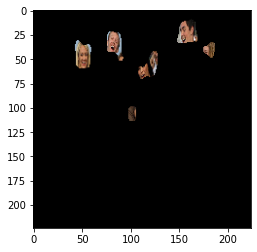

In [29]:
# This step is important because `X_test[2]` pixel values are between 0 and 1  and we want to restore the original input image  
test_img = np.array(
    tensorflow.keras.preprocessing.image.array_to_img(X_test[2])
)

# Doing the same operation on the mask 
mask=np.uint8(preds_val[2]*255)

# Now in the new mask, values are now between 0 and 255 (they doesn't reach 255)
# So  we need to make all the bright pixels ( pixel having values > 180) equal to 255 and and the dark pixels ( pixels having values < 120) equal to 0
mask[mask >= 180] = 255
mask[mask <= 120] = 0

# Now we will apply the mask to the image to make it only show the faces in the image
masked_image = cv2.bitwise_and(test_img, test_img, mask=mask)
plt.imshow(masked_image)

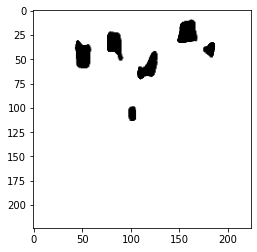

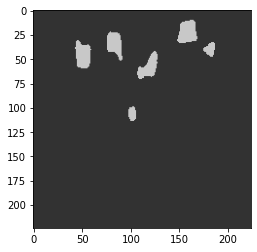

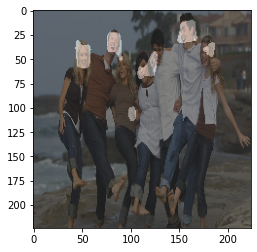

In [30]:
# The original mask is for the faces only, so if we want to mask the background, we need to invert this mask
bg_mask = cv2.bitwise_not(mask)

plt.figure()
plt.imshow(bg_mask, cmap="gray")

alpha = 0.6 #! closer to one will have more saturation (more obequie) 

# This is the overlay  we will apply to our input image to make the background a little bit darker, Note that it should have the  dimensions of the original image
overlay = np.zeros((*bg_mask.shape, 3), dtype="uint8")

# Now we will loop over the channels of the overlay. Then, in each chanel we will make the background pixels dark (equal to 50) and the faces more bright (equal to 200)
for i in range(3):
  overlay[:, :, i][bg_mask!=0] = 50
  overlay[:, :, i][bg_mask==0] = 200

# The final step is to use this method to put the overlay over our original test image
final = cv2.addWeighted(overlay, alpha, test_img, 1 - alpha, 0,)

plt.figure()
plt.imshow(overlay)

plt.figure()
plt.imshow(final)